In [25]:

import os
os.getcwd()

'C:\\Users\\Luka\\Desktop\\torch\\frane\\image data-to csv'

In [26]:
os.listdir()

['.ipynb_checkpoints',
 'hough',
 'output',
 'part1-image processing.ipynb',
 'part2 -tessarect_regex_and_pandas_csv.ipynb',
 'transform',
 'txt',
 'zadaci']

In [27]:
#importing tools, and converting our target photo to the grayscale image

import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

#this is a location where my target photo is
img = cv2.imread("zadaci\slika1.png")
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)



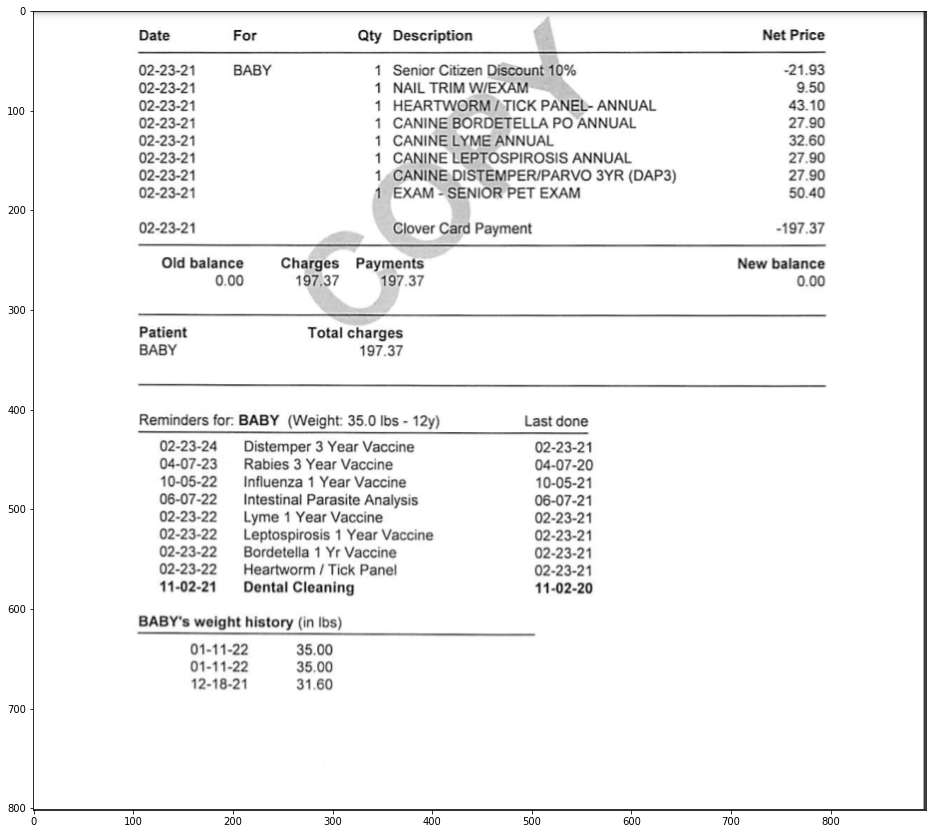

In [28]:
plt.figure(figsize=(16,16))
plt.imshow(gray, cmap="gray")

In [29]:
#with shape, we can see height and width
img.shape

(802, 896, 3)

In next cell, I did a cropping first, because most of the edges are dark(if photos are scanned) and this will produce some
extra horizontal lines that I don't want -however if I just crop a photo by 15pixels(or similar number), I am solving a that kind of a noise.


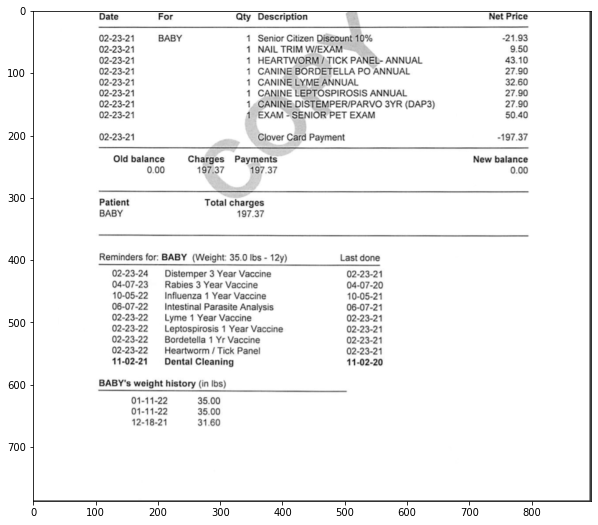

In [30]:

y1 =0
x1=0

h = img.shape[0]
w =img.shape[1] 
img_croped = img[15:y1+h, x1:x1+w]
crop_img_gray = gray[15:y1+h, x1:x1+w]
plt.figure(figsize=(10,10))
plt.imshow(crop_img_gray, cmap="gray")

In [31]:

#edges = cv2.Canny(gray,20,60,apertureSize = 3)
#plt.imshow(edges, cmap="gray")

In [32]:
#for some reason i had problem with canny... on the other hand, sobel worked just fine 
edges2 = cv2.Sobel(crop_img_gray, dx = 0, dy = 1, ksize = 3, ddepth= int())

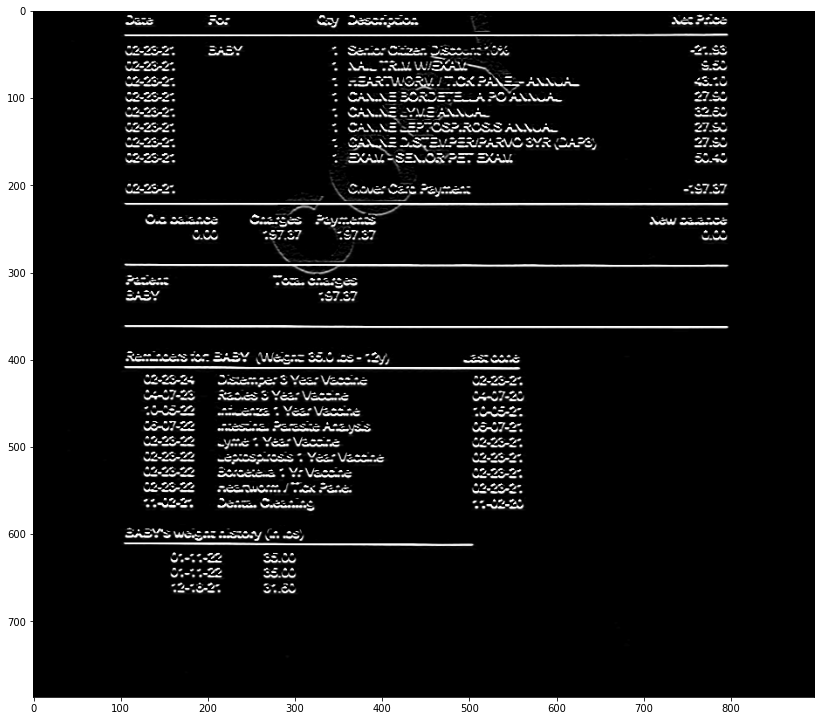

In [33]:
plt.figure(figsize=(14,14))
plt.imshow(edges2, cmap="gray")

In [34]:
#this was a hard part. Basic code was "googled" but I needed a lot of tweaking and documentation to get things working
# theta=np.pi/180 is default setting. if you do it np.pi/4 , you will get an 90 angle which detect only horizontal lines
#then I needed to adjust rho and threshold so i could take all(or most) horizontal lines. 
#formula that is working - increase a rho and lower a threshold - and put some minimum line length and you are good to go
#even this will create lot of the "noise" , on some photos there were a lot of lines, those who close to each-others and that was problem
#fixing that took me some time


lines = cv2.HoughLinesP(image=edges2,rho=10,theta=np.pi/4, threshold=5,lines=np.array([]), minLineLength=400)
a,b,c = lines.shape
for i in range(a):
         
    cv2.line(img_croped , (lines[i][0][0], lines[i][0][1]), (lines[i][0][2], lines[i][0][3]), ( 255,0,0), 3, cv2.LINE_AA)

    cv2.imwrite('output\hough1.jpg', img_croped)
print(a,b,c)

6 1 4


In [35]:
#cordinate of all lines
print(lines)

[[[100 222 798 222]]

 [[100 293 798 293]]

 [[161 364 797 364]]

 [[102  28 797  28]]

 [[100 612 505 612]]

 [[104 410 559 410]]]


In [36]:
print(lines.shape)

(6, 1, 4)


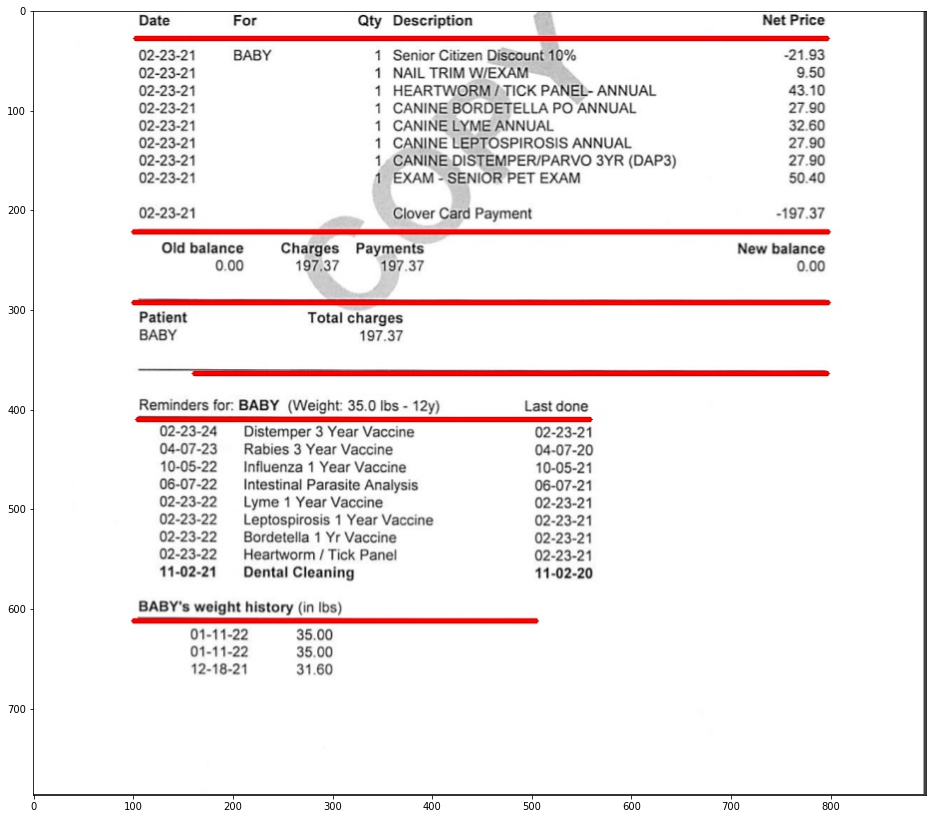

In [37]:
img2 = cv2.imread('output\hough1.jpg')


plt.figure(figsize=(16,16))
plt.imshow(img2)

In [38]:
# removing channel dimension from photo, so I can work with it with numpy array
lines2 =lines.reshape(lines.shape[0],lines.shape[2])

In [39]:
#this is important - I googled this code, this is how you can sort lines. 
#because all my important data is between first line and second line- I am sorting lines by "y"(or height)

lines2 =lines2[lines2[:, 1].argsort()]

In [40]:
#as you can see in this example coordinates of the first and second row are next to each others.
#because all my important data should be between first and second line, I need to make those two close lines together as one line
#if I do that, I will just get a one line, and I will be able to extract data that is important
#you can extract any data, if first line and second line are just 1 or 2 or 20 pixels away. but if I connect those close lines to one line, I am ready to go
lines2

array([[102,  28, 797,  28],
       [100, 222, 798, 222],
       [100, 293, 798, 293],
       [161, 364, 797, 364],
       [104, 410, 559, 410],
       [100, 612, 505, 612]], dtype=int32)

In [41]:
#this is a solution. i tried to google "HoughLines clustering" , and there was a lot of complicated code.
#so I made my own "complicated code". If two lines are near each others, my code will just delete one line

for i in range(len(lines2)):
    if i+1 == lines2.shape[0]:
        break
    else:
        if abs(lines2[i+1][1]-lines2[i][1])<20:
            lines2 =np.delete(lines2, i, axis=0)
            
    

In [42]:
#now this is an updated matrix with a relevant lines
lines2

array([[102,  28, 797,  28],
       [100, 222, 798, 222],
       [100, 293, 798, 293],
       [161, 364, 797, 364],
       [104, 410, 559, 410],
       [100, 612, 505, 612]], dtype=int32)

In [43]:
#height is a distance between two important lines(first and second )
height =lines2[1][3] -lines2[0][1]
print(height)

194


In [44]:
print(x1, w)

0 896


In [45]:
#first point x1 is a at 0
#width is always a maximum width of the photo
#first y1 point is a first y (lines[0][1]) - lines[0] is a first row, and each row has an array( [x1,y1,x2,y2]), and we need y1 [1]
#.. we will come to second y2 when we add height

x_crop =x1
y_crop= lines2[0][1]



width = w

print(f"x: {x_crop}, y: {y_crop}, width: {width}, height: {height}")

x: 0, y: 28, width: 896, height: 194


In [46]:
#first we import and crop photo between those lines
img_before = cv2.imread("output/hough1.jpg")
cropped = img_before[y_crop:y_crop+height, x_crop:width]

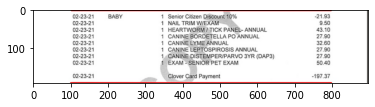

In [47]:
plt.imshow(cropped)

In [48]:
#we are saving this photo that have all data we need, and without most of the noise , and this photo will go to the "tesseract"
cv2.imwrite('transform/trans1.jpg',cropped )

True